In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
from src.mesoscaler.core import Mesoscale, P0

pressure = [P0, 1000, 900, 800, 700, 500, 400, 300]

ms = Mesoscale(200, 175, pressure=pressure, rate=20)
ms

Mesoscale:
- scale: [ 1.00  4.74 10.68 13.44 15.26 17.70 18.60 19.37]
-   hpa: [1013.25 1000.00  900.00  800.00  700.00  500.00  400.00  300.00]
-    dx: [ 200.00  948.93 2135.97 2687.91 3051.46 3539.82 3720.32 3874.94]
-    dy: [ 175.00  830.32 1868.97 2351.92 2670.03 3097.35 3255.28 3390.57]

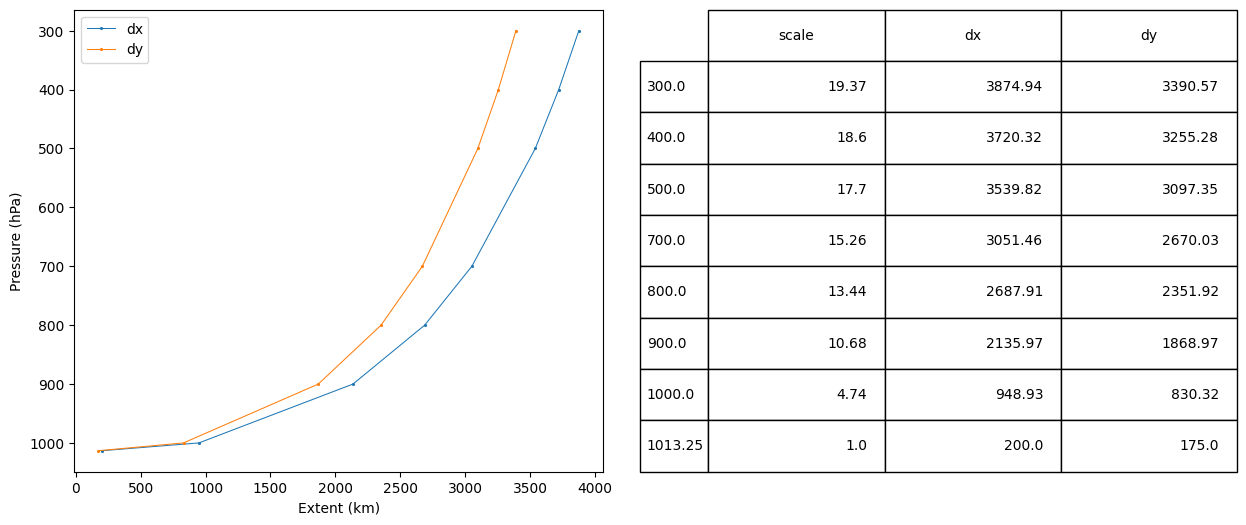

In [3]:
X1, X2, Y = ms.dx, ms.dy, ms.hpa
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)
ax.invert_yaxis()
ax.plot(X1, Y, linestyle="-", linewidth=0.75, marker=".", markersize=2.5)
ax.plot(X2, Y, linestyle="-", linewidth=0.75, marker=".", markersize=2.5)
ax.set_ylabel("Pressure (hPa)")
ax.set_xlabel("Extent (km)")
ax.legend(["dx", "dy"])

ax2 = fig.add_subplot(122)
df = ms.to_pandas()

ax2.axis("off")
mpl_table = ax2.table(
    cellText=df.to_numpy().round(2).astype(str).tolist(),
    rowLabels=df.index.tolist(),
    bbox=[0, 0, 1, 1],  # type: ignore
    colLabels=df.columns.tolist(),
)